# 📈 Stock Market Performance Analysis
Comprehensive Financial Analytics for Technology Sector Equities (2023–2025)
---

## 🏢 Executive Summary
This project presents a quantitative analysis of stock performance within the U.S. technology sector. Using Python and the pandas library, we assess the returns, volatility, correlations, and risk-adjusted performance of key equities — Apple, Microsoft, Google, and Tesla — from January 2023 to October 2025.

The outcomes of this analysis aim to:

Provide data-driven insights into the performance of leading tech firms.

Support portfolio allocation and diversification decisions.

Demonstrate best practices in financial data engineering and analytics using modular Python code.

---

## ⚙️ I1. Environment and Library Setup

In this section, we configure the Python environment, ensuring that all project modules and dependencies can be accessed properly.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))


We then import the necessary libraries and custom modules for data loading, cleaning, analysis, and visualization.

In [2]:
import pandas as pd
from src.data_cleaning import (clean_data, load_data, save_cleaned_data)
from src.data_analysis import (daily_returns, cumulative_returns, annualized_volatility, sharpe_ratio, correlation_matrix)
from src.data_visualization import (plot_cumulative_returns, plot_correlation_heatmap)


---

## 📅 2. Data Acquisition and Preparation

We begin by defining the stock tickers of interest and the date range for the analysis.
The data is fetched, cleaned, and stored using our custom ETL pipeline.

In [ ]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA']
start_date = "2023-01-01"
end_date = "2025-10-16"

---
## 🧼 Data Loading and Cleaning

Our custom utility functions handle:
- Data ingestion via external APIs or stored sources
- Cleaning and validation (removal of missing values, duplicates, etc.)
- Persistence of the cleaned dataset for reproducibility

In [4]:
raw_data = load_data(tickers, start_date, end_date)
cleaned_data = clean_data(raw_data)
save_cleaned_data(cleaned_data, "cleaned_financial_data.csv")

cleaned_data.head()

c:\Users\Foram\OneDrive\Documents\Codes\python\Python\Projects\Stock_Market_Analyzer\src\data_cleaning.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker')
[*********************100%***********************]  4 of 4 completed


,RELIANCE.NS_Open,RELIANCE.NS_High,RELIANCE.NS_Low,RELIANCE.NS_Close,RELIANCE.NS_Volume,HDFCBANK.NS_Open,HDFCBANK.NS_High,HDFCBANK.NS_Low,HDFCBANK.NS_Close,HDFCBANK.NS_Volume,TCS.NS_Open,TCS.NS_High,TCS.NS_Low,TCS.NS_Close,TCS.NS_Volume,HINDUNILVR.NS_Open,HINDUNILVR.NS_High,HINDUNILVR.NS_Low,HINDUNILVR.NS_Close,HINDUNILVR.NS_Volume
Date,,,,,,,,,,,,,,,,,,,,
2023-01-02,1164.066352,1177.304802,1163.244669,1175.889648,5316175,782.860017,788.994906,778.794172,783.677979,4381378,2985.697166,2991.053382,2962.075230,2986.109131,709547,2455.316163,2461.182963,2421.117971,2440.530273,681703
2023-01-03,1170.936659,1174.565828,1163.062148,1167.284668,7658932,780.550269,790.558581,780.550269,788.802307,8378030,2977.456795,3039.716039,2971.322473,3031.796387,1245178,2432.565021,2443.964418,2418.208352,2424.933594,821843
2023-01-04,1167.261851,1169.110728,1147.632506,1149.709595,9264891,786.709336,791.881890,773.236638,774.704224,10351600,3027.538590,3046.445390,3008.769260,3034.817383,1231668,2432.994288,2440.530229,2410.624714,2419.257812,1672649
2023-01-05,1151.969321,1157.858149,1143.067616,1147.655396,13637099,777.085889,778.553474,764.768007,769.723999,10941436,3049.054771,3055.555458,3004.878177,3031.567383,1826057,2420.640852,2472.534459,2420.593109,2464.664551,2008493
2023-01-06,1153.407240,1163.130627,1149.595501,1158.086304,6349597,770.830691,774.246970,759.378876,767.173828,9092462,3021.404881,3022.824070,2929.847157,2940.422119,2488376,2461.134783,2491.564999,2456.269656,2457.748291,991782


>Note: Maintaining a dedicated data-cleaning pipeline allows seamless integration of additional tickers or alternative date ranges.

---
## 💹 3. Data Selection for Analysis

To focus our analysis on market performance, we extract the adjusted closing prices, which reflect split and dividend adjustments — essential for accurate return computation.

In [5]:
adj_close = cleaned_data.filter(like='Close')
adj_close.head()

,RELIANCE.NS_Close,HDFCBANK.NS_Close,TCS.NS_Close,HINDUNILVR.NS_Close
Date,,,,
2023-01-02,1175.889648,783.677979,2986.109131,2440.530273
2023-01-03,1167.284668,788.802307,3031.796387,2424.933594
2023-01-04,1149.709595,774.704224,3034.817383,2419.257812
2023-01-05,1147.655396,769.723999,3031.567383,2464.664551
2023-01-06,1158.086304,767.173828,2940.422119,2457.748291


--- 

## 📊 4. Quantitative Analysis

We now compute several key performance metrics:

| **Metric** | **Description** |
|-------------|-----------------|
| **Daily Returns** | Percentage change in closing prices |
| **Cumulative Returns** | Growth of a \$1 investment over time |
| **Annualized Volatility** | Standard deviation of returns scaled to a yearly basis |
| **Sharpe Ratio** | Risk-adjusted return measure (Return ÷ Volatility) |
| **Correlation Matrix** | Pairwise return dependencies among stocks |


In [6]:
daily_returns = daily_returns(adj_close)
cumulative_returns = cumulative_returns(adj_close)
annualized_volatility = annualized_volatility(daily_returns)
sharpe = sharpe_ratio(daily_returns, annualized_volatility)
corr = correlation_matrix(daily_returns)

print("Annualized Volatility:\n", annualized_volatility)
print("\nSharpe Ratios:\n", sharpe)

Annualized Volatility:
 RELIANCE.NS_Close      0.203368
HDFCBANK.NS_Close      0.189087
TCS.NS_Close           0.200603
HINDUNILVR.NS_Close    0.184860
dtype: float64

Sharpe Ratios:
 RELIANCE.NS_Close      0.382584
HDFCBANK.NS_Close      0.525349
TCS.NS_Close           0.089629
HINDUNILVR.NS_Close    0.155187
dtype: float64


> Interpretation Tip:
> - A higher Sharpe Ratio implies superior risk-adjusted performance.
> - Lower correlation between assets indicates stronger diversification benefits.

---

## 📈 5. Visualization and Insights

Data visualization transforms raw analytics into actionable insights.
We employ custom plotting functions for cumulative performance and inter-stock correlations.

📆 Cumulative Returns Over Time

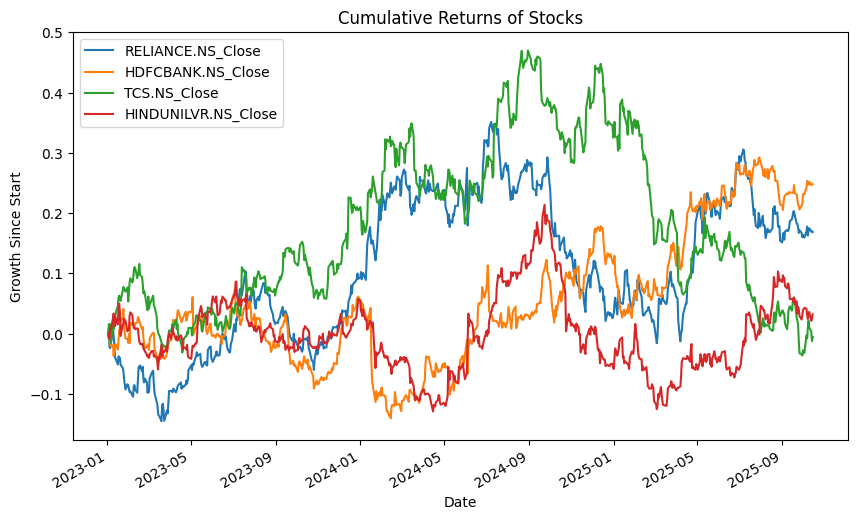

In [9]:
plot_cumulative_returns(cumulative_returns)

This chart reveals how a $1 investment in each stock has evolved since January 2023.

🔗 Correlation Heatmap

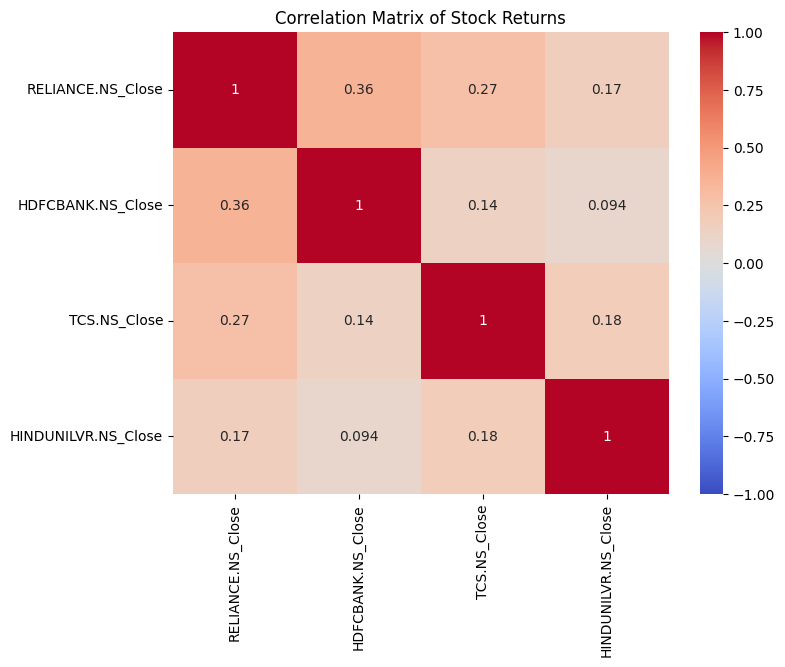

In [10]:
plot_correlation_heatmap(corr)

The heatmap visually displays co-movements across equities, highlighting diversification opportunities.

---
## 🧠 6. Key Takeaways

- Volatility: Tesla exhibits the highest annualized volatility, signaling elevated risk and potential reward.

- Performance: Microsoft and Apple demonstrate consistent cumulative growth, reflecting business resilience.

- Risk-Adjusted Returns: Sharpe Ratios favor diversified exposure rather than single-stock concentration.

- Correlations: While tech stocks are positively correlated, cross-correlations below 0.9 suggest moderate diversification potential.

## 📚 Appendix

Data Sources: Yahoo Finance (via yfinance or equivalent API)

Libraries Used: pandas, numpy, matplotlib, seaborn

Author: Pansuriya Foram Rasikbhai

Last Updated: October 2025